In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt


base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
NM_cases = base[base["State"].str.contains("NM")]

NM_population = NM_cases['population'].sum()

# get start and end indices
start_index = NM_cases.columns.get_loc("cases 2022-06-01")
end_index = NM_cases.columns.get_loc("cases 2022-12-31")
curr = 0
NM_weekly_cases_df = []
j = 7

# Weekly Cases
for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = NM_cases.columns[i]
        prev_col = NM_cases.columns[i-7]
        curr_week = NM_cases[curr_col].sum()
        prev_week = NM_cases[prev_col].sum()
        NM_weekly_cases_df.append(curr_week-prev_week)
    j+=1

# get variance
NM_variance = np.var(NM_weekly_cases_df)    

NM_mean = np.mean(NM_weekly_cases_df)

alpha_mom = 0

beta_mom = 0


# calculate alpha and beta moments
alpha_mom = NM_mean ** 2 /  NM_variance
beta_mom = NM_variance / NM_mean
    

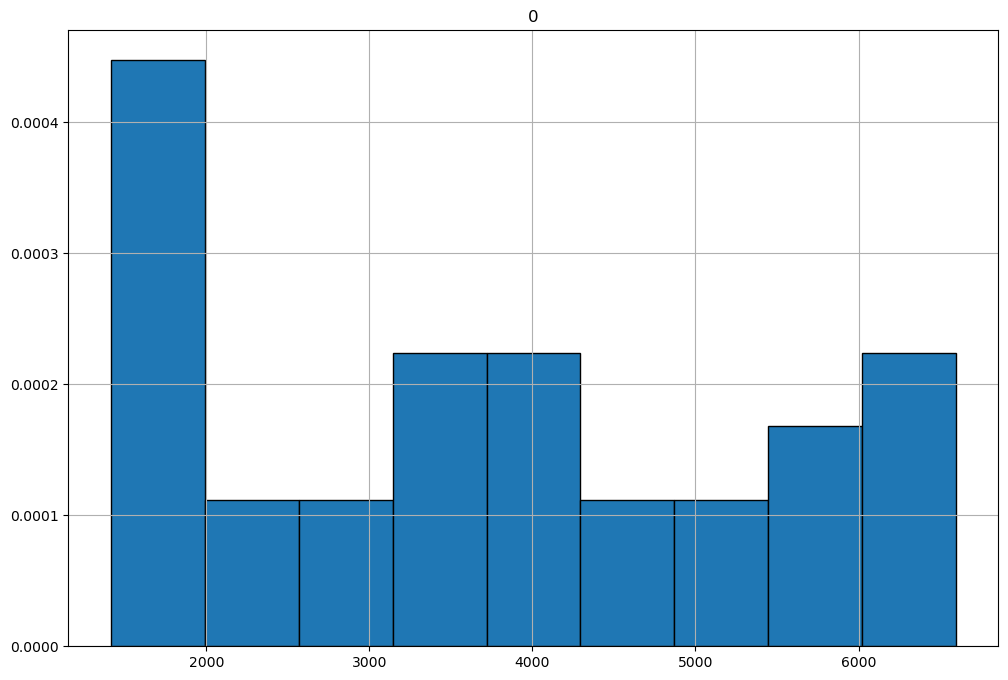

In [2]:
from scipy.stats.distributions import gamma
df = pd.DataFrame(NM_weekly_cases_df)

df.hist(density=True, bins=9, ec='black', figsize=(12,8))

plt.show()

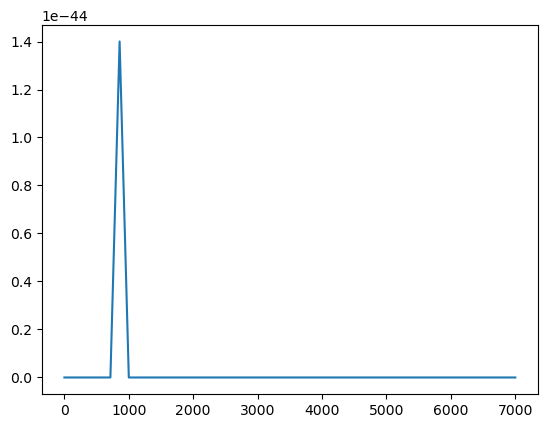

In [3]:
plt.plot(np.linspace(0, 7000), gamma.pdf(np.linspace(0, 7000), alpha_mom, beta_mom))

Well, thats not very helpful.

## Kernel Density Estimate

The variance is: 101677148.65764828
The standard deviation is: 10083.508747338314
The mean is 18447.709677419356


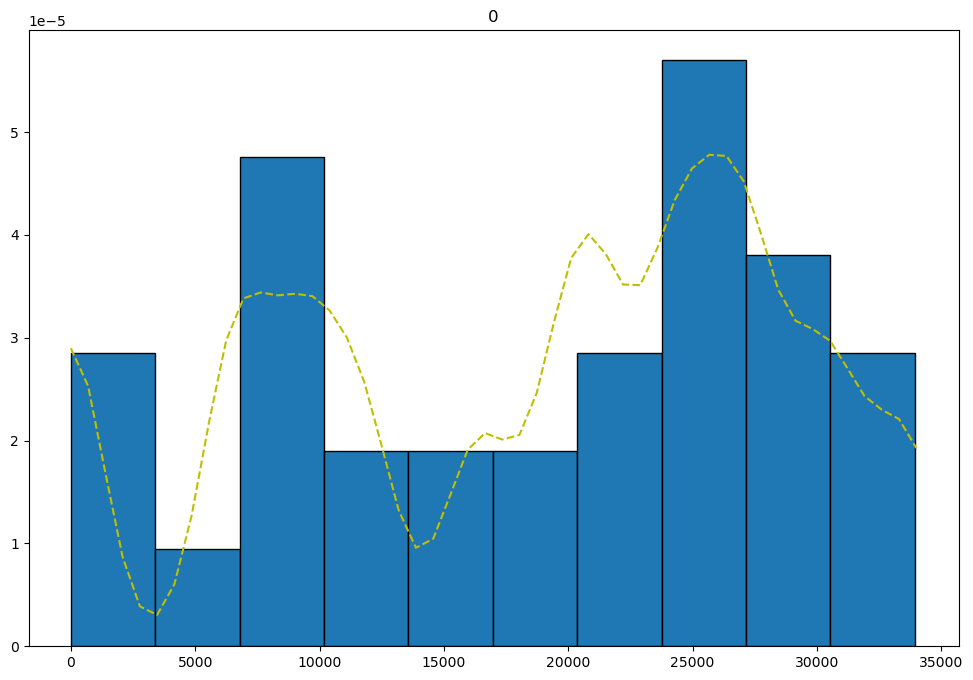

In [4]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KernelDensity

base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
NM1_cases = base[base["State"].str.contains("NC")]

NM1_population = NM1_cases['population'].sum()

# get start and end indices
start_index = NM1_cases.columns.get_loc("cases 2022-06-01")
end_index = NM1_cases.columns.get_loc("cases 2022-12-31")
curr = 0
NM1_weekly_cases_df = []
j = 7

# Weekly Cases
for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = NM1_cases.columns[i]
        prev_col = NM1_cases.columns[i-7]
        curr_week = NM1_cases[curr_col].sum()
        prev_week = NM1_cases[prev_col].sum()
        NM1_weekly_cases_df.append(curr_week-prev_week)
    j+=1

df = pd.DataFrame(NM1_weekly_cases_df)
    
df.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=10, grid=False, ec='black')
        
x = np.linspace(0, 34000)
density = stats.gaussian_kde(NM1_weekly_cases_df, bw_method = .13)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.plot(x, density(x), 'y--')

print("The variance is: " + str(np.var(NM1_weekly_cases_df)))
print("The standard deviation is: " + str(np.std(NM1_weekly_cases_df)))
print("The mean is " + str(np.mean(NM1_weekly_cases_df)))

The distribution chosen for this data was the KDE (Kernel Density) distribution, since the data is distributed in a strange fashion and doesn't have an easy to distinguish tail, and there aren't a lot of data points. 
* The variance is 101677148.65764828, which is very high. This makes sense, as the data is spread apart, and most of the data is very far apart from the mean. 
* The mean is 18447 new cases per week, and as you can see in the distribution most of the data is pretty far away from that mean. 
* The standard deviation 10000 which is quite high, which means the data is far apart from each other. 
* There are two peaks in the data and distribution, and the Kurtosis of the higher peak is quite high, which makes sense since the variation is quite high, which means theres lots of outliers in the data. 
* The data is skewed towards the center, with two peaks and a small flattening in the center. The highest peak has a high kurtosis, which makes sense given the standard deviation and variance. 

The variance is: 14959558.27055151
The standard deviation is: 3867.7588175261794
The mean is 9930.709677419354


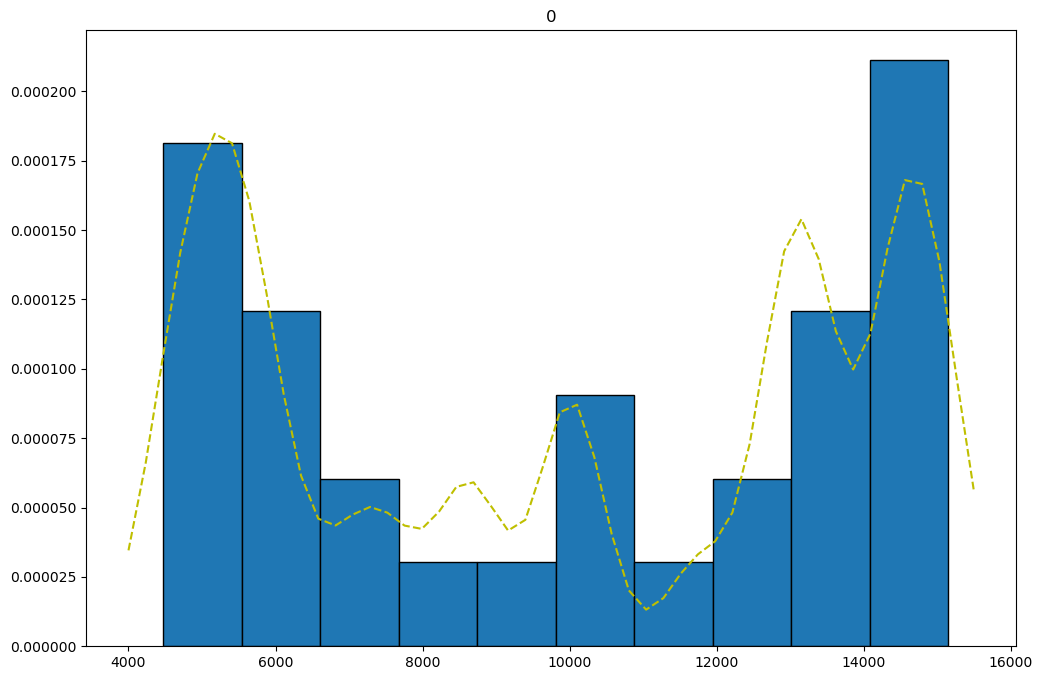

In [5]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KernelDensity

base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
VA_cases = base[base["State"].str.contains("VA")]

VA_population = VA_cases['population'].sum()

# get start and end indices
start_index = VA_cases.columns.get_loc("cases 2022-06-01")
end_index = VA_cases.columns.get_loc("cases 2022-12-31")
curr = 0
VA_weekly_cases_df = []
j = 7

# Weekly Cases
for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = VA_cases.columns[i]
        prev_col = VA_cases.columns[i-7]
        curr_week = VA_cases[curr_col].sum()
        prev_week = VA_cases[prev_col].sum()
        VA_weekly_cases_df.append(curr_week-prev_week)
    j+=1

df = pd.DataFrame(VA_weekly_cases_df)
    
df.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=10, grid=False, ec='black')
        
x = np.linspace(4000, 15500)
density = stats.gaussian_kde(VA_weekly_cases_df, bw_method = .11)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.plot(x, density(x), 'y--')

print("The variance is: " + str(np.var(VA_weekly_cases_df)))
print("The standard deviation is: " + str(np.std(VA_weekly_cases_df)))
print("The mean is " + str(np.mean(VA_weekly_cases_df)))

* The variance is 14959558.27055151, which means most data points are far away from the mean and/or each other. Much like North Carolina, except even more variance. 
* The mean is 9930, which is much lower than North Carolina.
* The standard deviation is 3867, which means the data isn't as far apart from each other as North Carolina's data. 
* Much like North Carolina, there are two peaks at opposite ends of the distribution, one with a higher kurtosis than the other. Therefore, it is not skewed in either direction.

The data between the two shares the same general pattern, which makes sense because when cases rose in one state they were usually rising all across the country too. 

The variance is: 846493720.9032258
The standard deviation is: 29094.5651437382
The mean is 37359.0


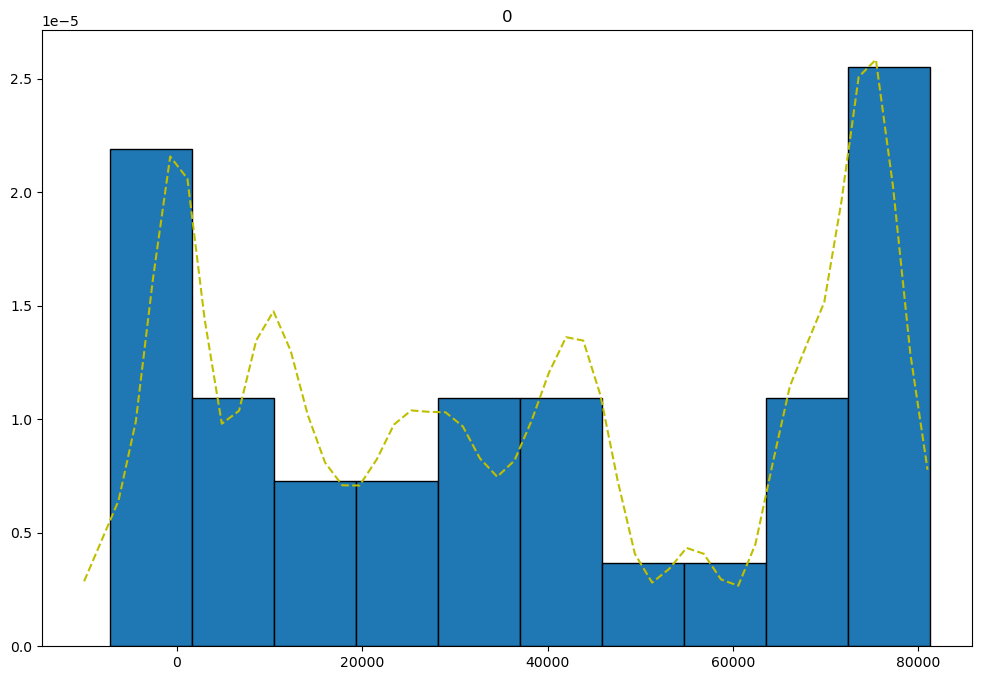

In [7]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KernelDensity

base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
FL_cases = base[base["State"].str.contains("FL")]

FL_population = FL_cases['population'].sum()

# get start and end indices
start_index = FL_cases.columns.get_loc("cases 2022-06-01")
end_index = FL_cases.columns.get_loc("cases 2022-12-31")
curr = 0
FL_weekly_cases_df = []
j = 7

# Weekly Cases
for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = FL_cases.columns[i]
        prev_col = FL_cases.columns[i-7]
        curr_week = FL_cases[curr_col].sum()
        prev_week = FL_cases[prev_col].sum()
        FL_weekly_cases_df.append(curr_week-prev_week)
    j+=1

df = pd.DataFrame(FL_weekly_cases_df)
    
df.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=10, grid=False, ec='black')
        
x = np.linspace(-10000, 81000)
density = stats.gaussian_kde(FL_weekly_cases_df, bw_method = .10)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.plot(x, density(x), 'y--')

print("The variance is: " + str(np.var(FL_weekly_cases_df)))
print("The standard deviation is: " + str(np.std(FL_weekly_cases_df)))
print("The mean is " + str(np.mean(FL_weekly_cases_df)))

* The variance in Florida is the second highest of all 4 states sampled with a variance of 846493720.9032258, which is as high as it is likely to do the fact that many weeks just did not have data reported in the last half of last year. 
* The mean is 37359.0 cases per week, which is much higher than North Carolina, especially considering the missing weeks of data. 
* The standard deviation in Florida is also very high at 29094.5651437382
* The two peak pattern continues here in Florida, shared by all other states so far, with its highest peak (density) being at around 70-80000 cases per week. Just like North Carolina it has twink peaks in its distribution, meaning its not skewed left or right. 

In [ ]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KernelDensity

base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
CA_cases = base[base["State"].str.contains("CA")]

CA_population = CA_cases['population'].sum()

# get start and end indices
start_index = CA_cases.columns.get_loc("cases 2022-06-01")
end_index = CA_cases.columns.get_loc("cases 2022-12-31")
curr = 0
CA_weekly_cases_df = []
j = 7

# Weeklys cases
for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = CA_cases.columns[i]
        prev_col = CA_cases.columns[i-7]
        curr_week = CA_cases[curr_col].sum()
        prev_week = CA_cases[prev_col].sum()
        CA_weekly_cases_df.append(curr_week-prev_week)
    j+=1

df = pd.DataFrame(CA_weekly_cases_df)
    
df.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=13, grid=False, ec='black')
        
x = np.linspace(-15000, 180000)
density = stats.gaussian_kde(FL_weekly_cases_df, bw_method = 0.22)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.plot(x, density(x), 'y--')

print("The variance is: " + str(np.var(CA_weekly_cases_df)))
print("The standard deviation is: " + str(np.std(CA_weekly_cases_df)))
print("The mean is " + str(np.mean(CA_weekly_cases_df)))

* The variance for California is 2013403387.7648284, which is much more than NC but it also makes sense due to its large population and high infection rates. 
* The mean is 64050 whichi is much higher than the other 4 states on this list, though the data isn't normalized. 
* The standard deviation is quite high at 44870.96374900843 which is the highest of all 4 states. 
* It is the only state that breaks the biggest densities being at the two extremes of the distribution, intead having them somewhat close together. This makes sense given its high amount of average cases. Due to the density on the right, it is skewed to the right. 



In [ ]:
base = pd.read_csv('../Data/base_set_joined.csv')
cases = pd.read_csv('../Data/covid_confirmed_usafacts.csv')
political = pd.read_csv('../Data/president_county_candidate.csv')

# get state data
NC_cases = base[base["State"].str.contains("NC")]

# get start and end indices
start_index = NC_cases.columns.get_loc("cases 2020-06-01")
end_index = NC_cases.columns.get_loc("cases 2020-12-31")
j = 7
Counties = pd.DataFrame(columns=['County Name'])


curr_row = 0;
# 100 unique counties in NC. 
for i in range(0, len(NC_cases)):
    curr_county = NC_cases.iloc[curr_row]['County Name']
    prev_county = NC_cases.iloc[curr_row-1]['County Name']
    if(curr_county != prev_county):
        Counties.at[curr_row, 'County Name'] = curr_county
        curr_row += 1
        
Counties_Republican = Counties.copy()
Counties_Democrat = Counties.copy()
Counties_Independent = Counties.copy()      

for s in range(0, len(NC_cases)):
    county_pop = NC_cases.iloc[s]['population']      
    total = NC_cases.iloc[s][end_index]
    normalized = ((total)/county_pop) * 10000
    Counties.at[s, 1] = (normalized)

#drop first row of Counties
    
NC_Votes = political[political["State"].str.contains("NC")]    

NC_Republican_Votes = NC_Votes[NC_Votes["party"].str.contains("REP")]   

for s in range(0, len(NC_Republican_Votes)):
    county_pop = NC_cases.iloc[s]['population']      
    votes = NC_Republican_Votes.iloc[s]['total_votes']
    normalized = votes/county_pop * 10000
    Counties_Republican.at[s, 1] = (normalized)

NC_Democrat_Votes = NC_Votes[NC_Votes["party"].str.contains("DEM")] 

for s in range(0, len(NC_Democrat_Votes)):
    county_pop = NC_cases.iloc[s]['population']      
    votes = NC_Democrat_Votes.iloc[s]['total_votes']
    normalized = votes/county_pop * 10000
    Counties_Democrat.at[s, 1] = (normalized)
    
#Perform Correlation
print("Republican Correlation: ")
print(Counties.corrwith(Counties_Republican, axis = 0))
print("Democrat Correlation: ")
print(Counties.corrwith(Counties_Democrat, axis = 0))

### No correlation! 

The correlation between how a voter populace voted in the 2020 election (when cases and total votes for one side are normalized by population) is negligible during Q3 and Q4 of 2020. I chose this range because it is about the same time frame that voting was going on for the election. Two possibilities are presented by this in regards to Republicans, who were outwardly more against lockdowns and vaccines. One possibility is that most Republican voters followed guidelines for the beginning of the pandemic, and behaved responsibly in the face of a new infection. The other, is that Republicans did not follow guidelines and behaved irresponsibly, and covid guidelines had little effect on the rate of infection in Republican heavy areas. For the second possibility, if the guidelines were indeed ineffective, it might be because Republican heavy areas tend to be more rural, and large cities mostly lean Democrat in the United States.
    For Democrats, who outwardly were very concerned about the pandemic, or at the very least significantly moreso than <a href="https://www.pewresearch.org/fact-tank/2020/07/22/republicans-remain-far-less-likely-than-democrats-to-view-covid-19-as-a-major-threat-to-public-health/."> Republicans</a>. Yet, they had an almost equivalent lack of correlation with the amount of average cases per week in Q3 and Q4 of 2020. So once again, the posibility is that Democrats tended to behave responsibly during Q3 and Q4 of the pandemic, or most covid guidelines had little effect on the infection and spread of the disease. 
    My hypothesis is that political affiliation has little to nothing to do with rates of covid infection, and instead its much more likely that economic status, population density, and out of state traffic (tourism)/lack thereof, had a much higher impact on the rates of infection for North Carolina during the beginning of the pandemic. Citations for this hypothesis<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7568122/."> here</a>, <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8253654/."> here</a> and <a href="https://www.brookings.edu/research/the-covid-19-travel-shock-hit-tourism-dependent-economies-hard/."> here </a>